In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
% matplotlib inline 

## Visualize data

In [2]:
def update_features(df):
    df["year"] = [str(i)[0:4] for i in df["date_"]]
    df["month"] = [str(i)[4:6] for i in df["date_"]]
    df["day"] = [str(i)[6:8] for i in df["date_"]]
    df["year"] = df["year"].astype(int)
    df["month"] = df["month"].astype(int)
    df["day"] = df["day"].astype(int)
    df = df.drop("date_", axis=1)
    df = df.drop("on_promotion", axis=1)
    return df

In [3]:
def pairwise_plot(f, fig_path):
    df = pd.read_csv(f)
    
    # add year, month, day features
    df = update_features(df)
#     print (df)
    sns_plot = sns.pairplot(df)
    sns_plot.savefig(fig_path)
    
save_path = './'

In [ ]:
path = "data/hackathon_dataset_2011.dat"
pairwise_plot(path, save_path + '2011.png')

In [ ]:
path = "data/hackathon_dataset_2010.dat"
pairwise_plot(path, save_path + '2010.png')

In [ ]:
path = "data/hackathon_dataset_2009.dat"
pairwise_plot(path, save_path + '2009.png')

In [4]:
df = pd.DataFrame()
data_files=["data/hackathon_dataset_2011.dat", "data/hackathon_dataset_2010.dat", "data/hackathon_dataset_2009.dat"]

for file_name in data_files:
    df = df.append(pd.read_csv(file_name))

df = update_features(df)

# sns_plot = sns.pairplot(df)
# sns_plot.savefig(save_path + 'total.png')
# print (df)

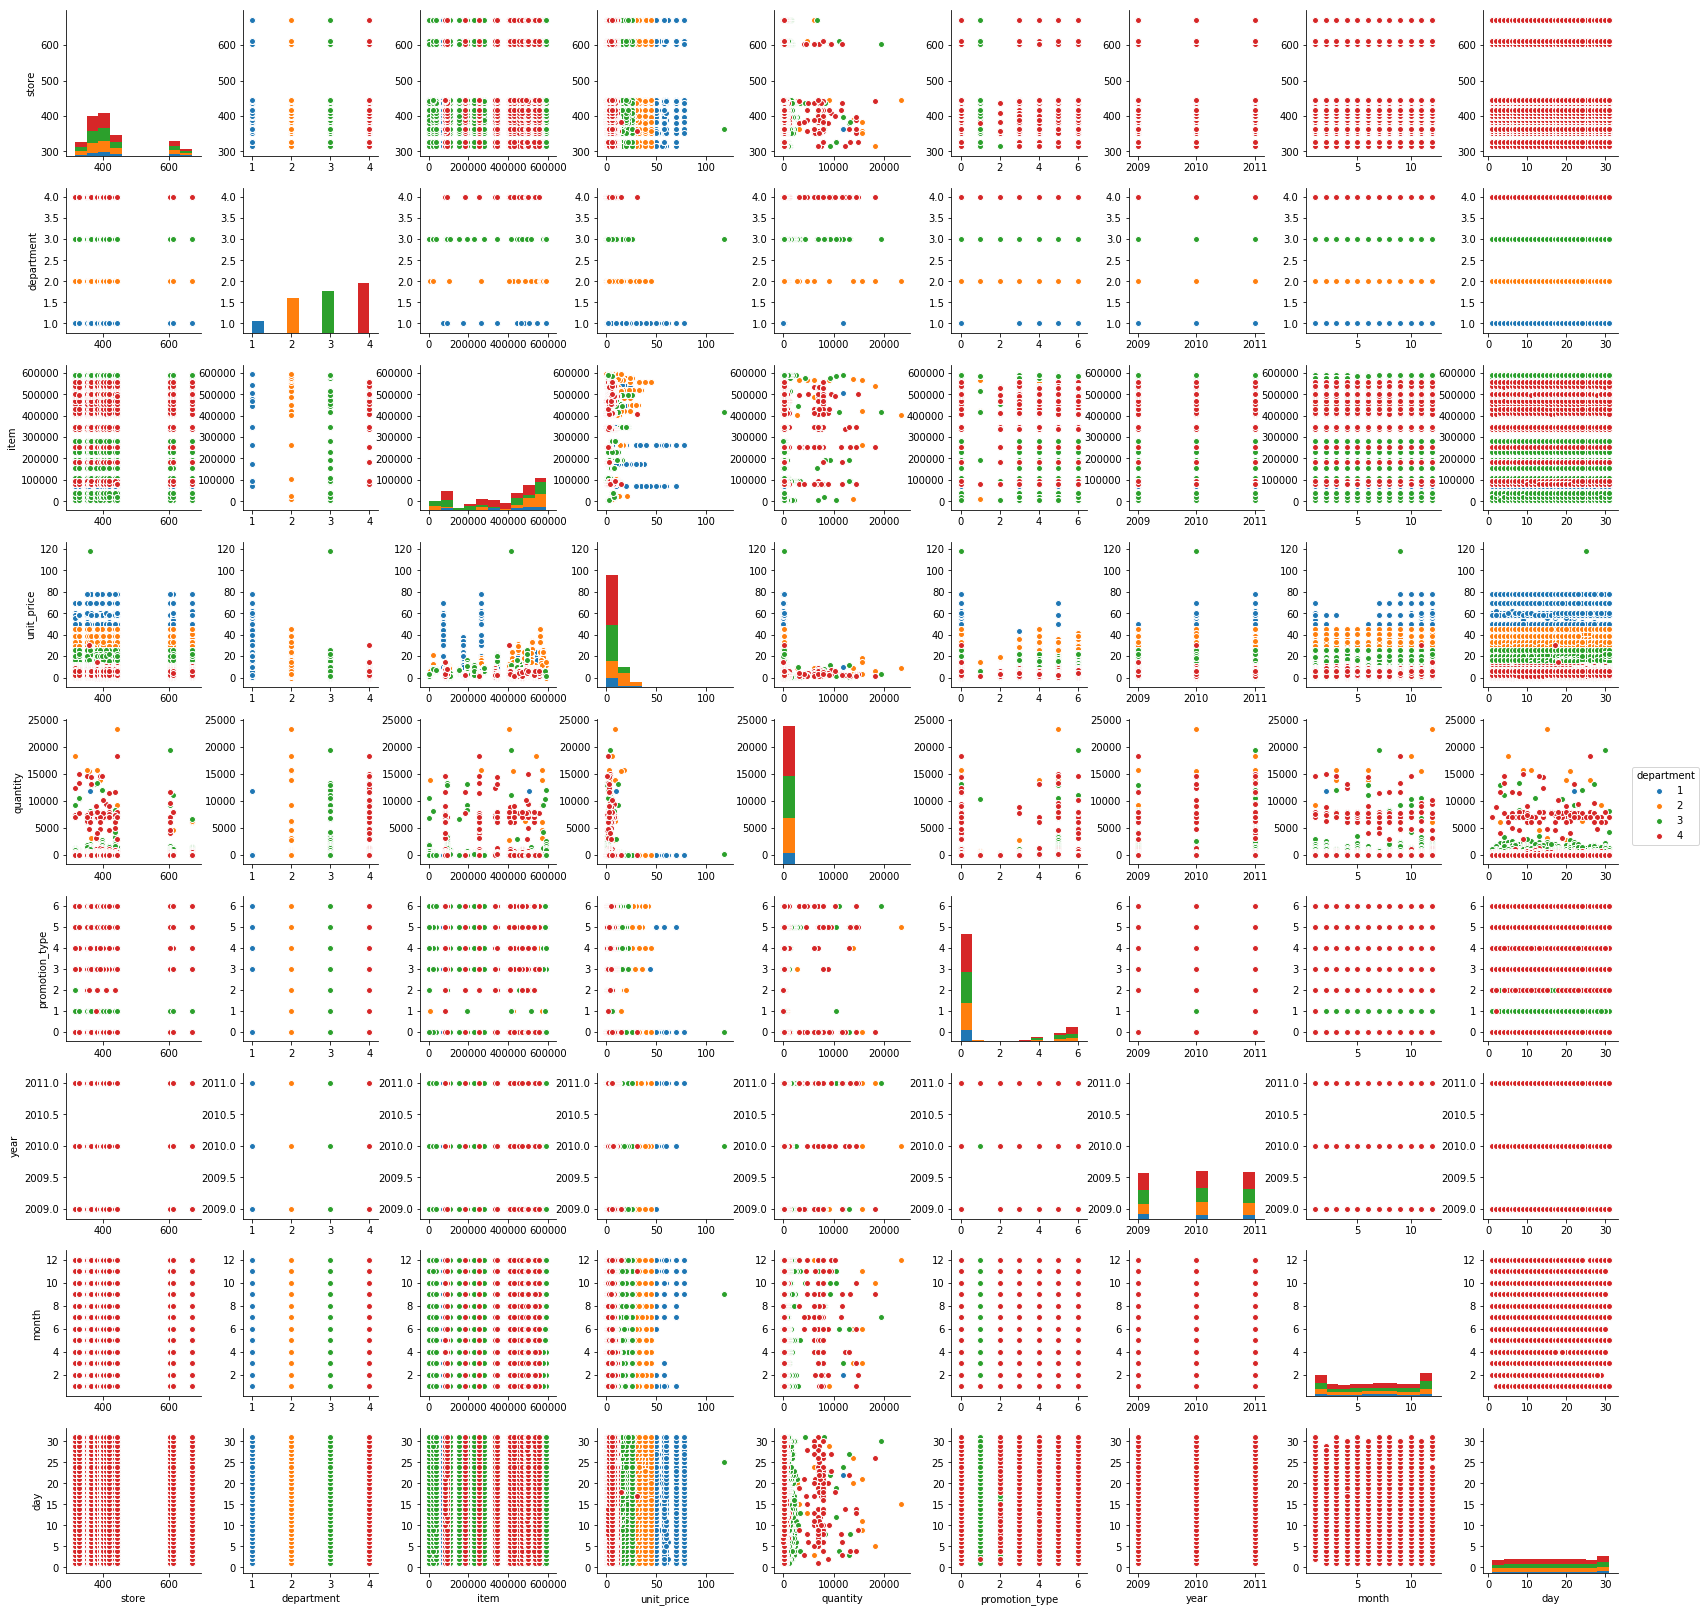

In [14]:
sns_plot = sns.pairplot(df, hue='department')

# Manual Pairwise Comparison

In [13]:
# path = "data/hackathon_dataset_2011.dat"
# df = pd.read_csv(path)
# df = update_features(df)

# pairs = [("store", "department"), ("store", "item"), ("store", "unit_price"), ("store", "promotion_type"), ("store")]
# features= list(df.columns.values)
# n_features = len(features)
# for i in range(n_features):
#     for j in range(i+1, n_features):
#         plt.figure(figsize=(15, 15))
#         f1 = features[i]
#         f2 = features[j]
#         plt.plot(df[f1], df[f2], 'o')
#         plt.xlabel(f1)
#         plt.ylabel(f2)
#         plt.show()

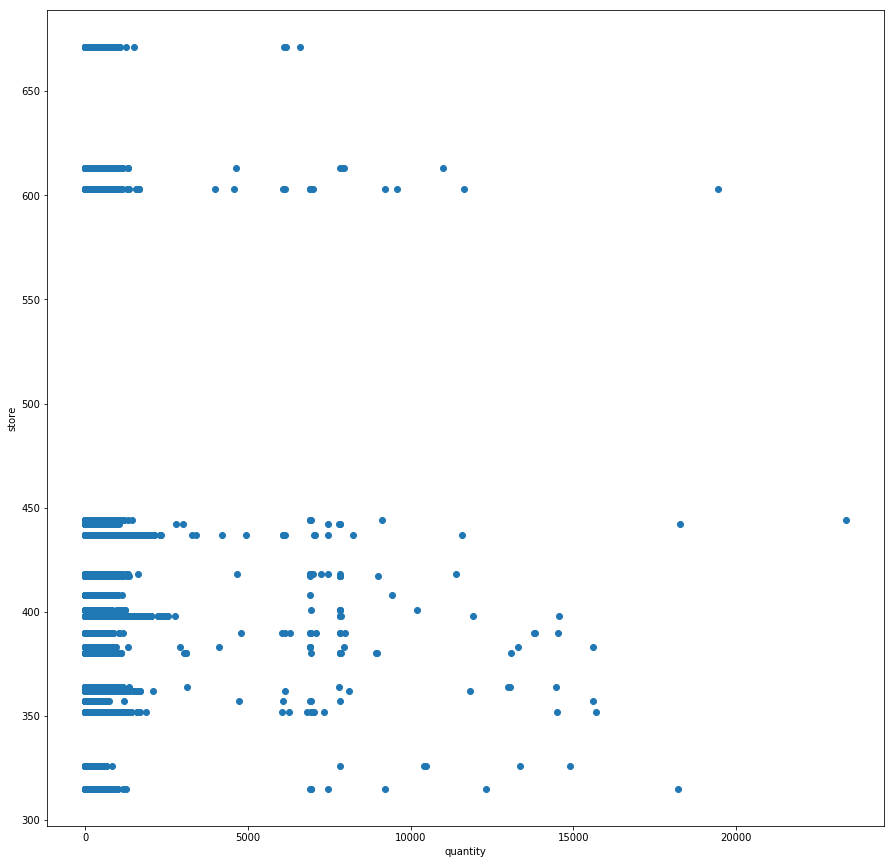

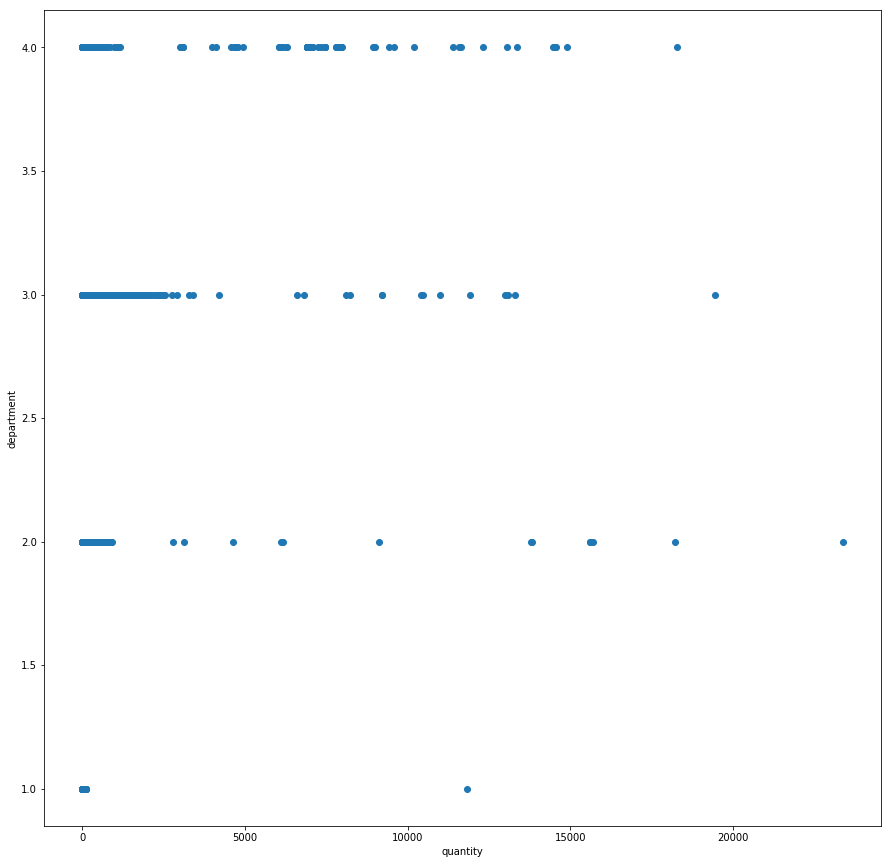

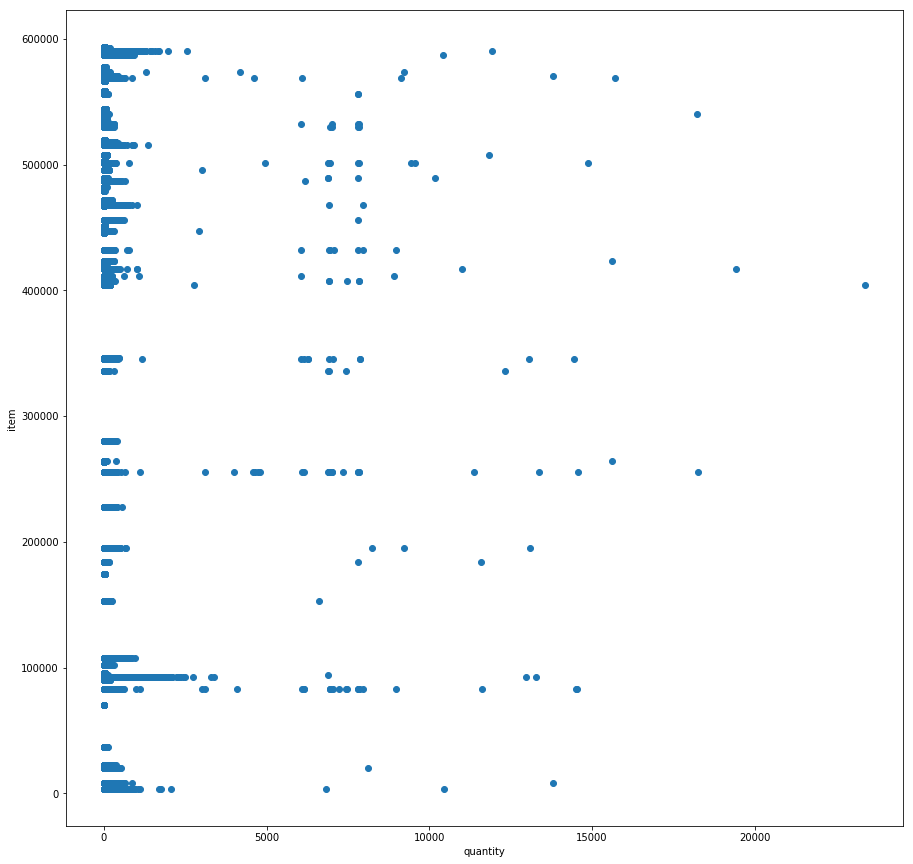

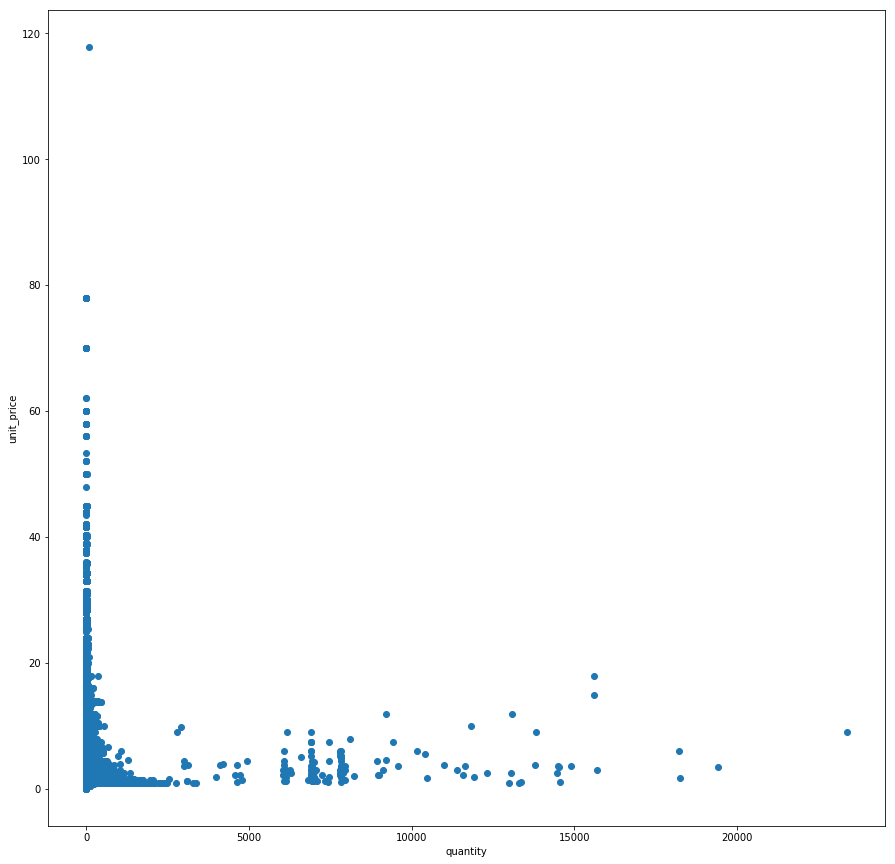

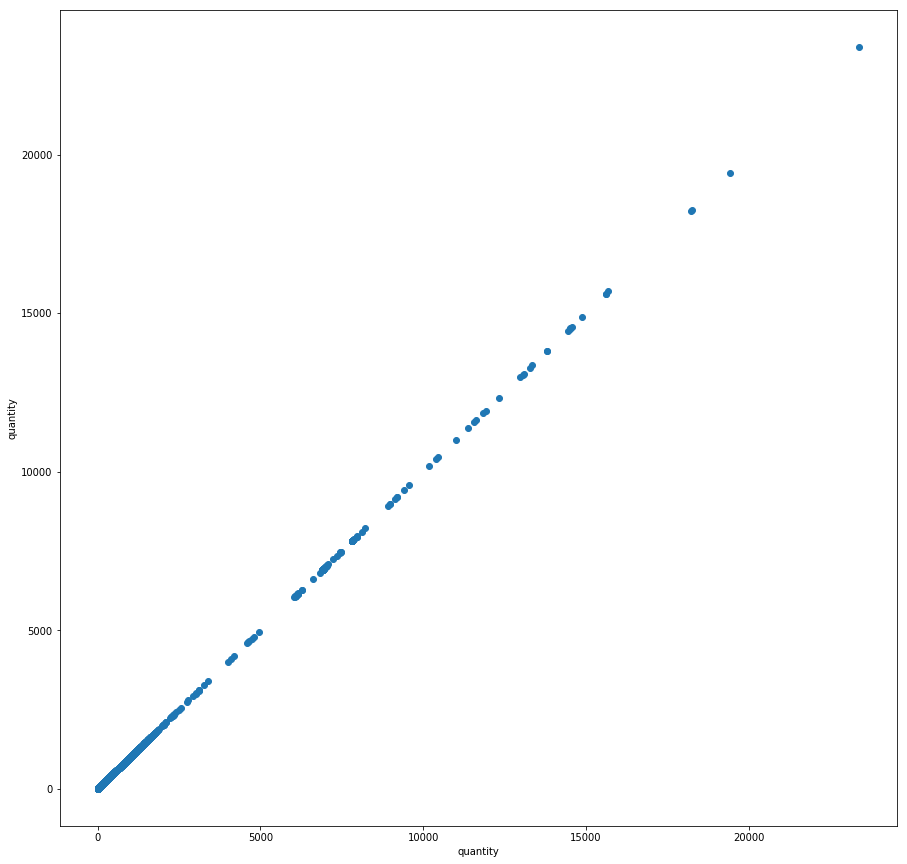

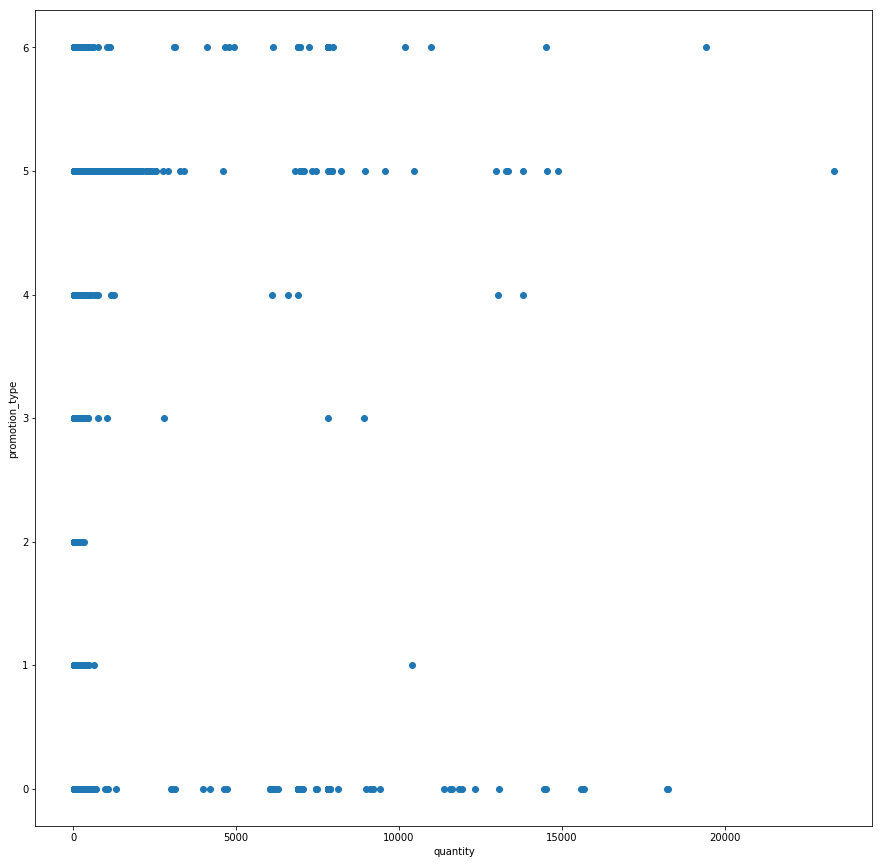

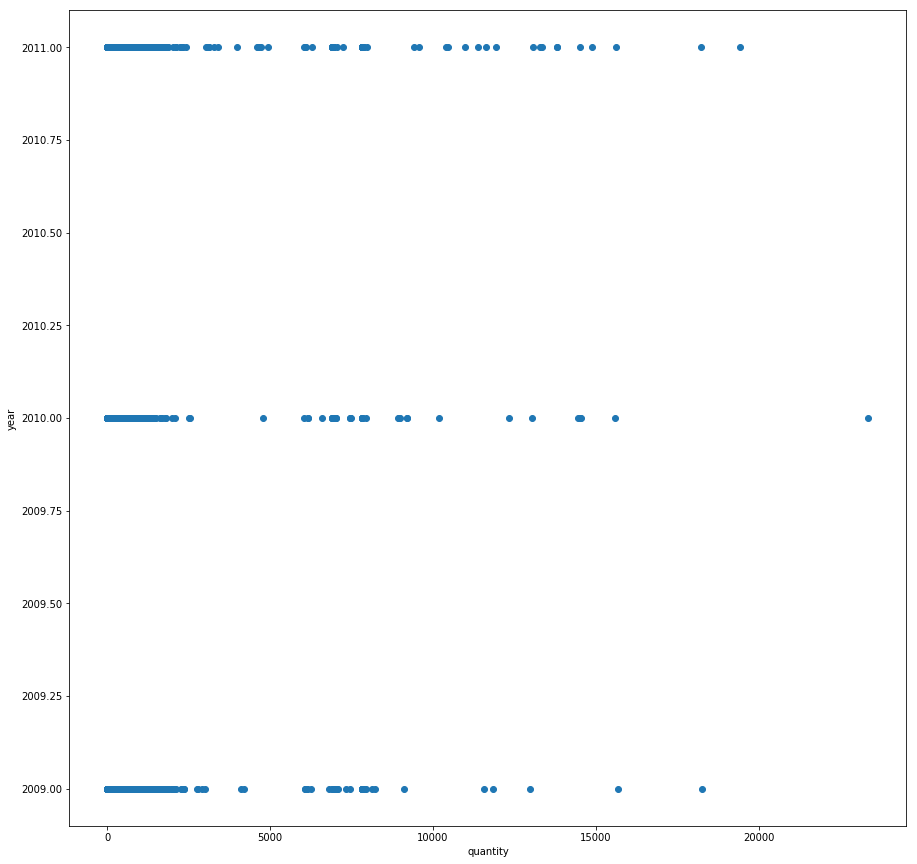

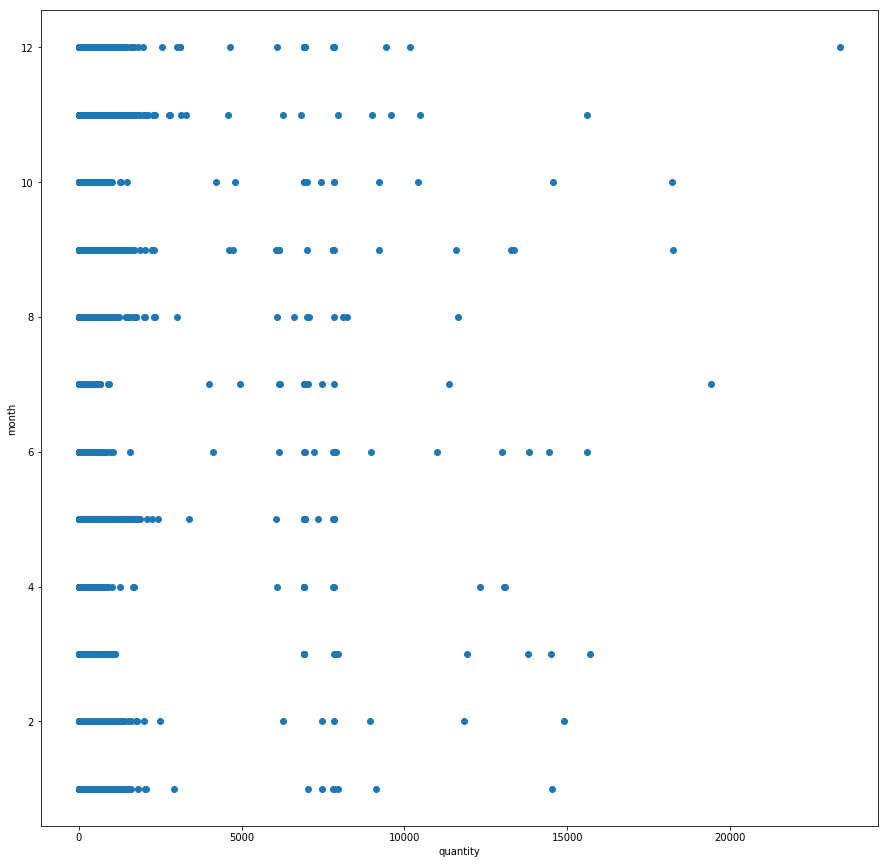

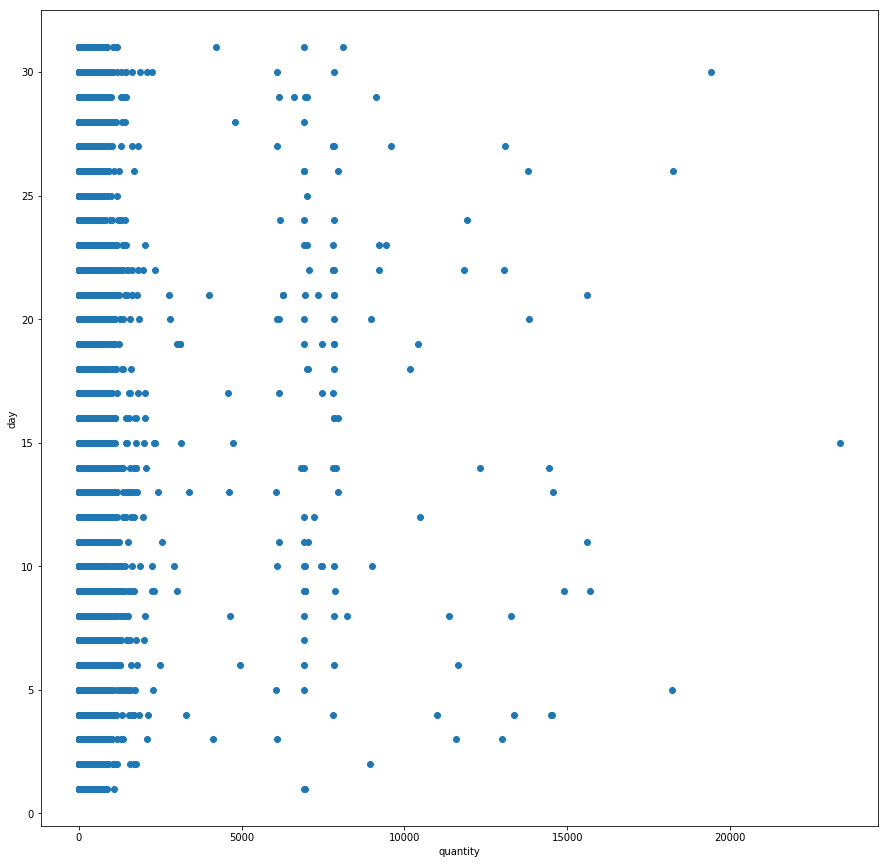

In [12]:
features= list(df.columns.values)
n_features = len(features)
for i in range(n_features):
    plt.figure(figsize=(15, 15))
    f1 = "quantity"
    f2 = features[i]
    plt.plot(df[f1], df[f2], 'o')
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

# Split data into training, validation, and test sets

In [24]:
df = pd.DataFrame()
data_files=["data/hackathon_dataset_2011.dat", "data/hackathon_dataset_2010.dat", "data/hackathon_dataset_2009.dat"]

for file_name in data_files:
    df = df.append(pd.read_csv(file_name))

df = update_features(df)
n_points = len(df)
n_train = int(n_points*0.7)
n_validation = int(n_points*0.15)
n_test = int(n_points*0.15)
np.random.seed(0)
shuffled_idxs = np.arange(n_points)
np.random.shuffle(shuffled_idxs)

train = df.iloc[shuffled_idxs[:n_train+1]]
validation = df.iloc[shuffled_idxs[n_train+1:n_train+n_validation+1]]
test = df.iloc[shuffled_idxs[n_train+n_validation+1:]]

In [25]:
result_file = "data/hacakthon_result.dat"
df = pd.read_csv(file_name)
result = update_features(df)

In [26]:
print (len(train))
print (len(validation))
print (len(test))
print (len(result))

946628
202848
202849
440670


In [30]:
def make_dataset_dict(df, train, validation, test):
    d = dict()
    
    d["train"] = dict()
    d["train"]["Y"] = train["quantity"].as_matrix()
    d["train"]["X"] = train.drop("quantity", axis=1).as_matrix()
    
    d["validation"] = dict()
    d["validation"]["Y"] = validation["quantity"].as_matrix()
    d["validation"]["X"] = validation.drop("quantity", axis=1).as_matrix()
    
    d["test"] = dict()
    d["test"]["Y"] = test["quantity"].as_matrix()
    d["test"]["X"] = test.drop("quantity", axis=1).as_matrix()
    
    return d

d = make_dataset_dict(df, train, validation, test)

In [39]:
import pickle

with open('datasets.pkl', 'wb') as f:
    pickle.dump(d, f, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('datasets.pkl', 'rb') as f:
    test = pickle.load(f)
    
with open('result.pkl', 'wb') as f:
    pickle.dump(result.as_matrix(), f, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('result.pkl', 'rb') as f:
#     test = pickle.load(f)
# print (test == d)
# print (d)
# print (test)